In this notebook I have tred to practice all the classification algorithms that I have learned in this course.
To check the path of current directory:

In [1]:
pwd

'C:\\Users\\souna'


Lets first load required libraries ie. numpy, pandas, matplotlib:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<font size="3">**About dataset**</font>

This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:
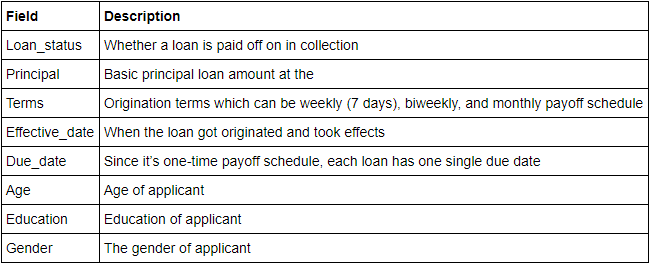


I have kept the dataset in my local directory and will upload the same in github.I'm hereby loading data from csv.

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

<font size="2">**Convert to date time object**</font>

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


<font size="5">**Data visualization and pre-processing**</font>

Let’s see how many of each class is in our data set:

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



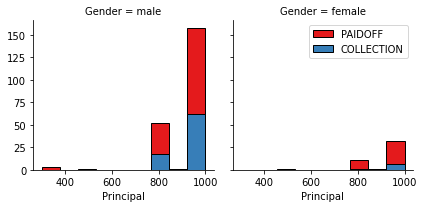

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

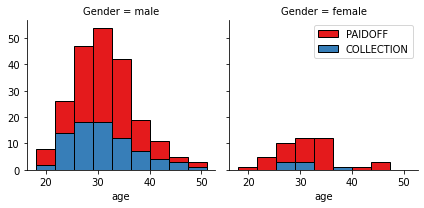

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<font size="5">**Pre-processing: Feature selection/extraction**</font>
    
Lets look at the day of the week people get the loan

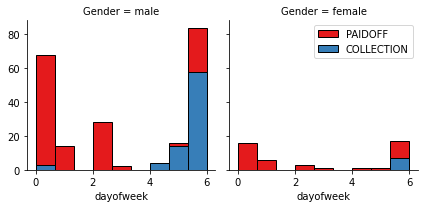

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

People getting the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4:

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


<font size="4">**Convert Categorical features to numerical values**</font>

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**86 % of female pay there loans while only 73 % of males pay there loan**

Lets convert male to 0 and female to 1:

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


<font size="4">**One Hot Encoding**</font>

What about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

**Feature befor One Hot Encoding**

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


**Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame**

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


<font size="3">**Feature selection**</font>

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


<font size="2">**Labels:**</font>

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)


<font size="3">**Normalize Data**</font>

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])


<font size="5">**Classification**</font>

Using the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

1)K Nearest Neighbor(KNN)

2)Decision Tree

3)Support Vector Machine

4)Logistic Regression


<font size="5">**K Nearest Neighbor(KNN)**</font>


In [20]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    knn_pred=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, knn_pred)
    std_acc[n-1]=np.std(knn_pred==y_testset)/np.sqrt(knn_pred.shape[0])
    #print("f1-score :: ",f1_score( y_testset, knn_pred, average='weighted'))

print(mean_acc)
knnbest = mean_acc.argmax()+1
print("Best Accuracy is with neighbor ",knnbest)
print("Best Accuracy is ",mean_acc.max())

[0.67142857 0.65714286 0.71428571 0.68571429 0.75714286 0.71428571
 0.78571429 0.75714286 0.75714286]
Best Accuracy is with neighbor  7
Best Accuracy is  0.7857142857142857


In [22]:
# F1 SCORE AND JACCARD SCORE FOR KNN WITH 7 NEIGBOURS
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_trainset,y_trainset)
knn_pred=neigh.predict(X_testset)
print("F1-SCORE:: ",f1_score( y_testset, knn_pred, average='weighted'))
print("JACCARD SIMILARITY SCORE:: ",jaccard_score(y_testset, knn_pred,pos_label = "PAIDOFF"))

F1-SCORE::  0.7766540244416351
JACCARD SIMILARITY SCORE::  0.765625


<font size="5">**Decision Tree**</font>

In [23]:
!conda install -c anaconda pydotplus -y

Solving environment: ...working... done

# All requested packages already installed.



In [24]:
# Import 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [25]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [26]:
# Print the shape of X_trainset and y_trainset. Ensure that the dimensions match
print("X-trainset-shape:: ", X_trainset.shape)
print("Y-trainset-shape:: ", y_trainset.shape)

X-trainset-shape::  (242, 8)
Y-trainset-shape::  (242,)


In [27]:
loanTree = DecisionTreeClassifier(criterion="entropy",max_depth=6)
loanTree # SHOWS DEFAULT PARAMS

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [28]:
# train the model on training set 
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

<font size="2">**Prediction**</font>

In [29]:
predTree = loanTree.predict(X_testset)

<font size="2">**Printing out predTree and y_testset to visually compare the prediction to the actual values.**</font>

In [30]:
# Lets see the Output of 5 results
print ("PREDICTED -- >", predTree [0:10])
print ("ACTUAL --> ", y_testset [0:10])

PREDICTED -- > ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
ACTUAL -->  ['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


<font size="2">**Evaluation**</font>

Next, let's import metrics from sklearn and check the accuracy of our model.

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7019230769230769


<font size="2">**Jaccard Score**</font>

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(y_testset, predTree,pos_label = "PAIDOFF")

0.6666666666666666

<font size="2">**F1 SCORE**</font>

In [33]:
from sklearn.metrics import f1_score
f1_score( y_testset, predTree, average='weighted')

0.7000725689404935

<font size="2">**Visualization**</font>

In [34]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

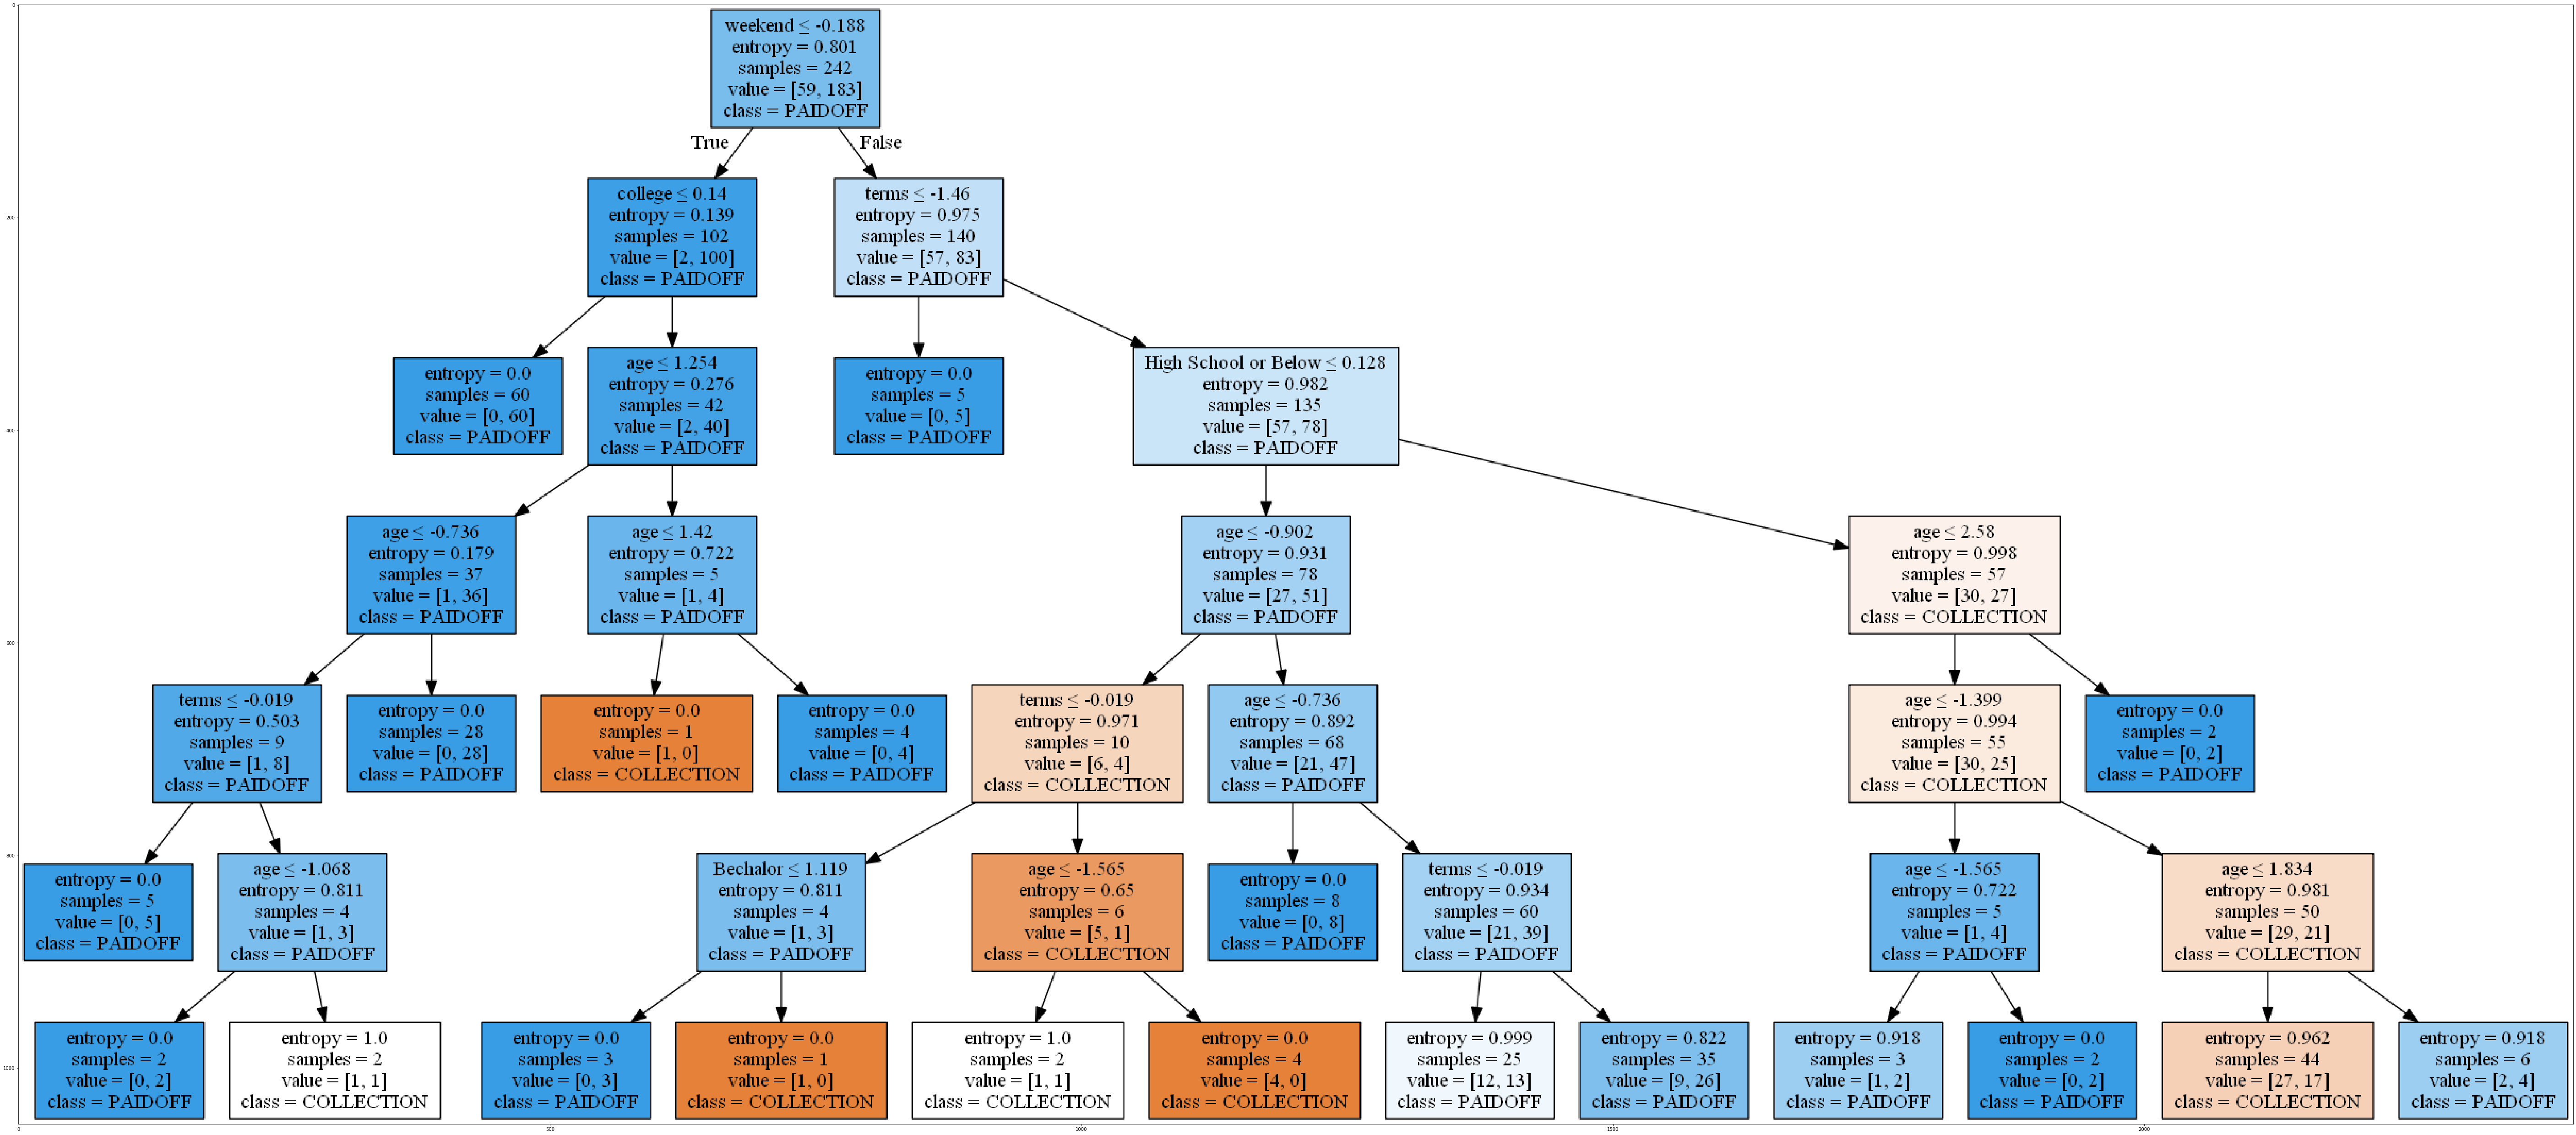

In [35]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns[:]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<font size="5">**Support Vector Machine**</font>

In [36]:
# SVM
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn import svm

knls = ['linear', 'rbf', 'sigmoid']
mean_accuracy = np.zeros((len(knls)))
for kernel in knls:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_trainset, y_trainset)
    svm_predict = clf.predict(X_testset)
    mean_accuracy[knls.index(kernel)] = metrics.accuracy_score(y_testset, svm_predict)

print( "The best accuracy was :: ", mean_accuracy.max())

The best accuracy was ::  0.7857142857142857


<font size="2">**FOR RBF::**</font>

In [37]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

svm_pred = clf.predict(X_testset)
svm_pred [0:5]

from sklearn.metrics import jaccard_score
jaccard_score(y_testset, svm_pred,pos_label = "PAIDOFF")

0.7272727272727273

<font size="2">**FOR LINEAR::**</font>

In [38]:
# SVM
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_trainset, y_trainset) 

svm_pred = clf.predict(X_testset)
svm_pred [0:5]

from sklearn.metrics import jaccard_score
jaccard_score(y_testset, svm_pred,pos_label = "PAIDOFF")

0.7857142857142857

<font size="2">**FOR SIGMOID::**</font>

In [39]:
# SVM
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_trainset, y_trainset) 

svm_pred = clf.predict(X_testset)
svm_pred [0:5]

from sklearn.metrics import jaccard_score
jaccard_score(y_testset, svm_pred,pos_label = "PAIDOFF")

0.7391304347826086

<font size="5">**Logistic Regression**</font>

In [40]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR
lr_predict = LR.predict(X_testset)
lr_predict

from sklearn.metrics import jaccard_score
print("Jaccard Score :: ",jaccard_score(y_testset, lr_predict,pos_label = "PAIDOFF") )


from sklearn.metrics import f1_score
print("F1 Score :: ",f1_score(y_testset, lr_predict, average='weighted'))

Jaccard Score ::  0.6764705882352942
F1 Score ::  0.6670522459996144


In [42]:
lr_prob = LR.predict_proba(X_testset)
lr_prob

array([[0.50342411, 0.49657589],
       [0.45206108, 0.54793892],
       [0.30814137, 0.69185863],
       [0.34259441, 0.65740559],
       [0.32025918, 0.67974082],
       [0.31680537, 0.68319463],
       [0.48830223, 0.51169777],
       [0.47823116, 0.52176884],
       [0.34259441, 0.65740559],
       [0.49340523, 0.50659477],
       [0.33806721, 0.66193279],
       [0.49662244, 0.50337756],
       [0.24891945, 0.75108055],
       [0.34190983, 0.65809017],
       [0.43751801, 0.56248199],
       [0.2576049 , 0.7423951 ],
       [0.5235721 , 0.4764279 ],
       [0.30450266, 0.69549734],
       [0.50166374, 0.49833626],
       [0.31959753, 0.68040247],
       [0.44277025, 0.55722975],
       [0.49410199, 0.50589801],
       [0.51350359, 0.48649641],
       [0.47203543, 0.52796457],
       [0.40944678, 0.59055322],
       [0.50846471, 0.49153529],
       [0.51098443, 0.48901557],
       [0.374577  , 0.625423  ],
       [0.50418432, 0.49581568],
       [0.25299647, 0.74700353],
       [0.

In [43]:
from sklearn.metrics import log_loss
log_loss(y_testset, lr_prob)

0.5772288805583228


<font size="4">**Report**</font>

Reporting the accuracy of the built model using different evaluation metrics:

<font size="3">**1.KNN	---  Jaccard=0.766   ;   F1-score=0.777	  ;   LogLoss=NA**   </font>

<font size="3">**2.Decision Tree   ---  Jaccard=0.667	   ;   F1-score=0.700		  ;   LogLoss=NA**   </font>

<font size="3">**3.SVM	   ---  Jaccard=0.727	;   F1-score=0.786	;   LogLoss=NA**   </font>

<font size="3">**4.LogisticRegression	 ---  Jaccard=0.676	;   F1-score=0.667	;   LogLoss=0.577**   </font>

Request you to share your feedback

Thank you!

Sounak